# Heart disease prediction using Logistic Regression

This project uses a dataset containing various values of a persons biological condition.The result is stored in a column named 'target' whose output is '0' or '1' which represents 'No'/'Yes' (for heart disease) respectively. 
 
 Tha data available is trained using a 'Logistic Regression' model and then the predicted values are compared with the actual values to compute the models accuracy.  Various metrics are also used to compute the efficiency.

In [60]:
# Importing the basic packages.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Reading the input data.

data=pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Description of all the column names.

Age - Age in years , sex - M/F , cp-chest pain type , trest - resting blood pressure , chol - serum cholesterol , fbs - fasting blood sugar level , restecg - resting cardioelectrographic results , thalach - maximum heart rate achieved , exang - Exercise induced angina , oldpeak - ST depresstion induced by exercise relative to rest , slope - the slope of peak exercise ST segment , ca- number of major vessels coloured by flouroscopy , thal- 3=normal 6=fixed defect 7=reversable defect , target -1/0 (Heart disease prediction).

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


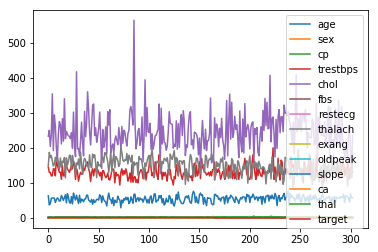

In [10]:
data.plot()
plt.show()

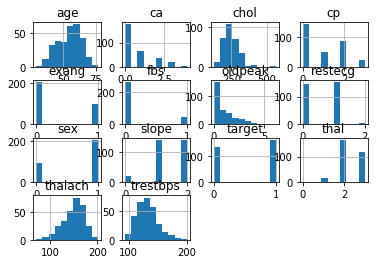

In [12]:
#cols=['age','sex','chol','oldpeak','ca','slope']
data.hist()
plt.show()

In [15]:
data.shape

(303, 14)

In [17]:
X=data.iloc[:,0:13].values
Y=data['target'].values
X,Y

(array([[63.,  1.,  3., ...,  0.,  0.,  1.],
        [37.,  1.,  2., ...,  0.,  0.,  2.],
        [41.,  0.,  1., ...,  2.,  0.,  2.],
        ...,
        [68.,  1.,  0., ...,  1.,  2.,  3.],
        [57.,  1.,  0., ...,  1.,  1.,  3.],
        [57.,  0.,  1., ...,  1.,  1.,  2.]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [66]:
# Importing all necessary modules.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve , auc
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
# Making predictions.

predictions=lr.predict(x_test)

In [68]:
y_test.shape

(61,)

In [69]:
predictions.shape

(61,)

In [105]:
# Using score method of the classifier to find out accuracy.

lr.score(x_test,y_test)

0.9016393442622951

In [70]:
# The above score value is the same as the accuracy_score computed using the metrics module.

print(metrics.accuracy_score(y_test,predictions))

0.9016393442622951


Here it can be observer that the accuracy of the predictions made is 90% .

In [71]:
# Printing the confusion matrix.

conf=metrics.confusion_matrix(y_test,predictions)
conf

array([[26,  6],
       [ 0, 29]], dtype=int64)

In [72]:
# Printing the classification report.

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      0.81      0.90        32
          1       0.83      1.00      0.91        29

avg / total       0.92      0.90      0.90        61



Text(33,0.5,'Actual')

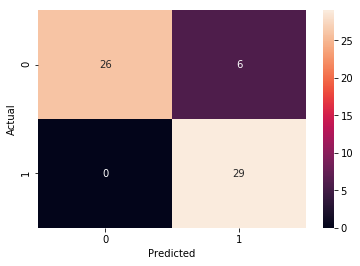

In [73]:
# Heatmap of the confusion matrix.

sns.heatmap(conf,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [78]:
# Printing the values of classification report individually.

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy score :",accuracy_score(y_test,predictions))
print("Precison score :", precision_score(y_test,lr.predict(x_test)))
print("Recall_score :", recall_score(y_test,lr.predict(x_test)))
print("f1 score :" ,f1_score(y_test,lr.predict(x_test)))

Accuracy score : 0.9016393442622951
Precison score : 0.8285714285714286
Recall_score : 1.0
f1 score : 0.90625


In [81]:
# Probability prediction.

predict_probabilities = lr.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])

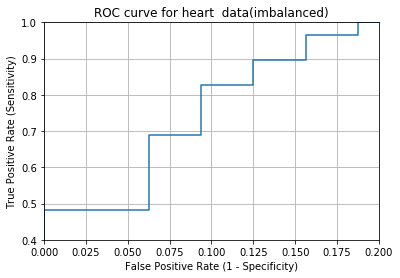

In [104]:
# Plotting the false-positive against true-positive rates.

plt.plot(fpr, tpr)
plt.xlim([0., 0.2])
plt.ylim([0.4, 1.0])
plt.title('ROC curve for heart  data(imbalanced)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [99]:
# Area under the ROC curve.

roc_auc=metrics.auc(fpr,tpr)
print("Area under ROC :%f" % roc_auc)

Area under ROC :0.948276
